In [1]:
#1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2. Loading Dataset
df = pd.read_csv(r'Amazon_Sale_Report.csv')

C:\Users\Nitro\AppData\Local\Temp\ipykernel_14344\121791746.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Amazon_Sale_Report.csv')


In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [11]:
df.shape

(128975, 24)

In [12]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
#3. Checking Null Values
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
df['Courier Status'].fillna(df['Courier Status'].mode()[0], inplace=True)
df['currency'].fillna(df['currency'].mode()[0], inplace=True)
df['Amount'].fillna(df['Amount'].mean(),inplace=True)
df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
df['ship-state'].fillna(df['ship-state'].mode()[0], inplace=True)
df['ship-postal-code'].fillna(df['ship-postal-code'].mean(), inplace=True)
df['ship-country'].fillna(df['ship-country'].mode()[0], inplace=True)
df['promotion-ids'].fillna(df['promotion-ids'].mode()[0], inplace=True)
df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0], inplace=True)


C:\Users\Nitro\AppData\Local\Temp\ipykernel_14344\3000337930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna(df['currency'].mode()[0], inplace=True)
C:\Users\Nitro\AppData\Local\Temp\ipykernel_14344\3000337930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [13]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [14]:
# Validate missing values
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel_            0
ship-service-level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status            0
qty                       0
currency                  0
amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids             0
b2b                       0
fulfilled-by              0
unnamed:_22           49050
dtype: int64


In [15]:
#4. Checking for Duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Remove duplicates
df.drop_duplicates(inplace=True)
# Validate duplicates
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


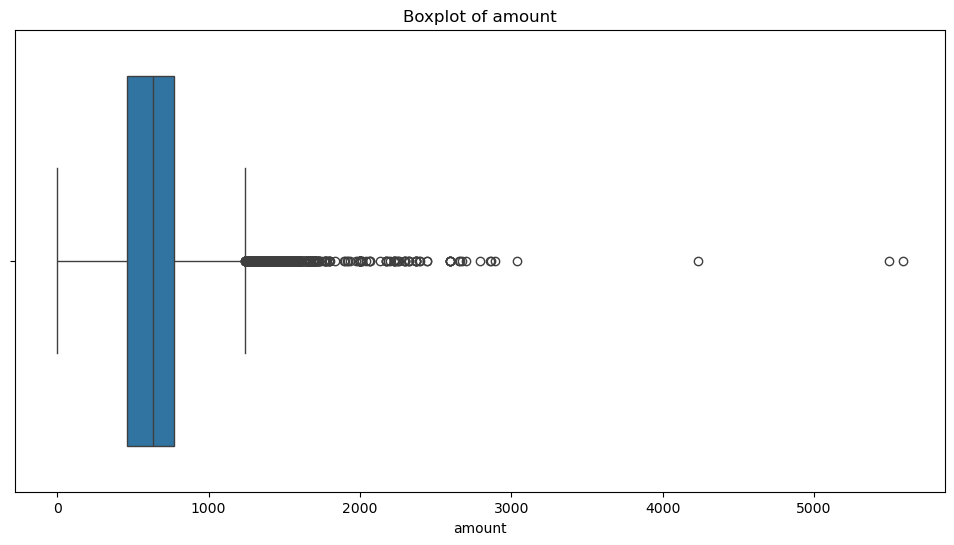

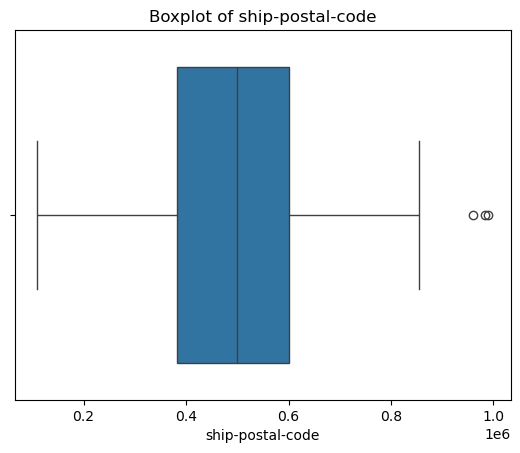

In [ ]:
 #5. Check for outliers using boxplot
plt.figure(figsize=(12, 6))
# Example: Boxplot to visualize outliers
for col in ['amount', 'ship-postal-code']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Example: Remove outliers using the IQR method
for col in ['amount', 'ship-postal-code']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

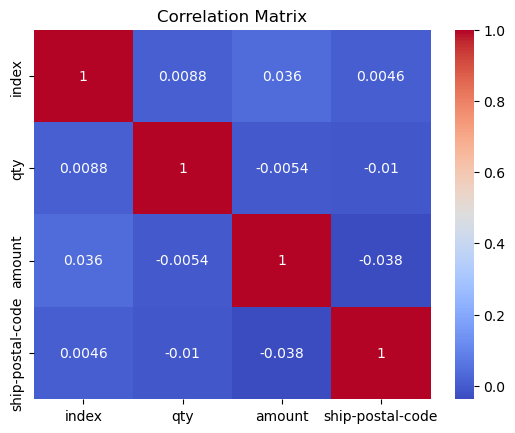

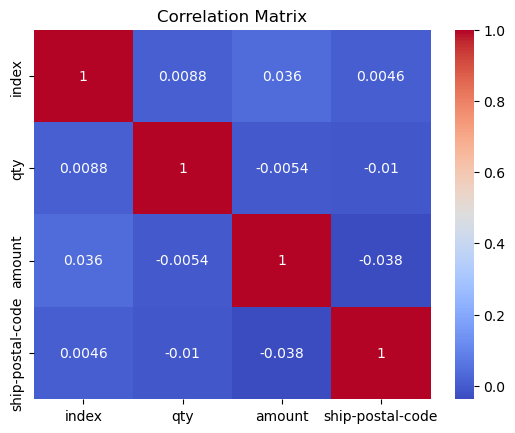

In [19]:
#6.  Check for multicollinearity
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Replace inf values and drop NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

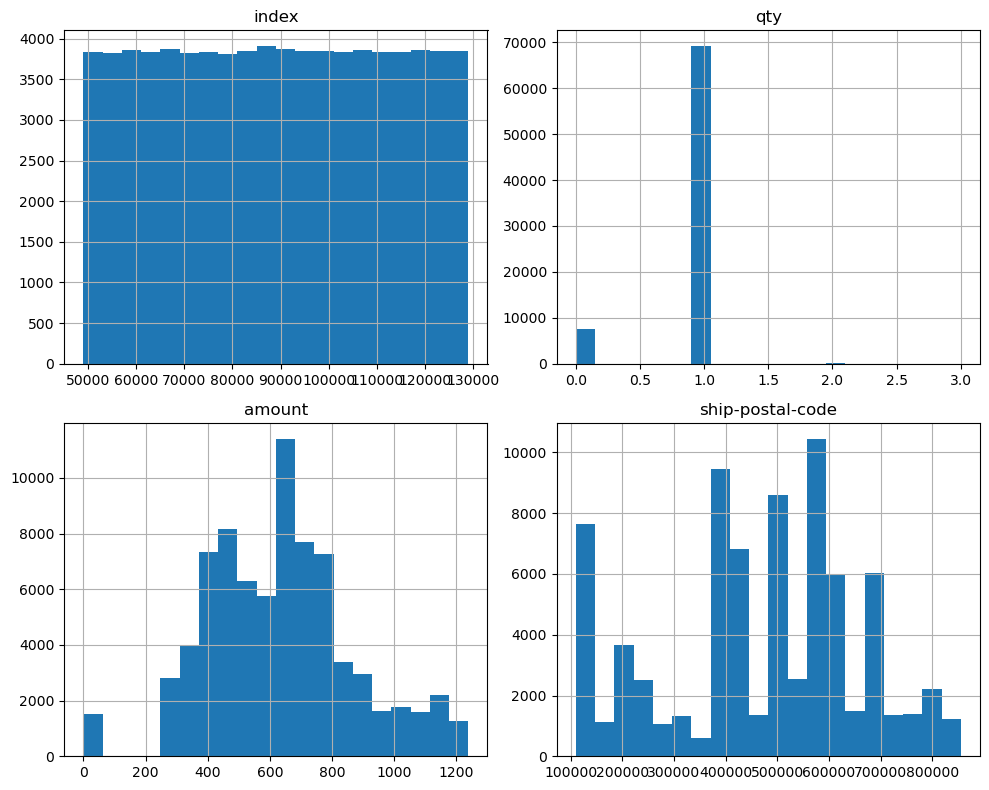

In [21]:
# Histograms for numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [23]:
# Example: Apply log transformation to 'Amount' if skewed
df['amount'] = np.log1p(df['amount'])

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical columns
scaler = MinMaxScaler()
df[['amount', 'ship-postal-code']] = scaler.fit_transform(df[['amount', 'ship-postal-code']])